## Data Cleaning and Visualisation

In this notebook, we performed the following steps to clean our dataset and visualise some statistics to better understand the data we were working with:

1. **Data Cleaning**
    
    We checked our dataset for any NULL values to determine if it was necesary to clean it. Since it was already rid of NULL values, we retained the original dataset. 
2. **Analytic Visualisation**
    
    We analysed the correlation between the various factors and bankruptcy data to identify the top 10 factors with the highest correlation to bankruptcy, as well as the relationships between bankrupt and non-bankrupt entries. 

    From this, we concluded that:
    1. our dataset was highly **imbalanced**, with an overwhelming minority of data being bankruptcy data (3.23% with Bankrupt = 1), and
    2. there was a **significant amount of outliers present** for the top correlated variable to bankruptcy

    Therefore, we explored whether it was necessary to remove outliers. 

3. **Evaluating Outliers**

    In this section, we focused on the top variable with the highest correlation to bankruptcy – "Net Income to Total Assets"

    We first removed the outlier entries of this variable, and evaluated the change in correlation with bankruptcy and the other variables. We then compared the correlation obtained using the data without outliers and the data with only outliers.

    Upon evaluation, we concluded that that removal of outliers did not substantially change the relationship between the variables. Furthermore, outliers made up a significant 8.23% of the data, within which lies 16% of the total companies which went bankrupt. Removing outliers could thus result in a loss of important information and inaccurate conclusions.

Thus, it would be wise to use another approach, such as upsampling, to resolve the skewed class distribution in our dataset while retaining important information. 
    


### Import necessary libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt


### Extract data from csv file

Our dataset that requires a high level of precision in the floating-point values. In this case, using float64 is necessary to ensure that the calculations and analysis performed on the data are accurate. While float32 would require less memory, the trade-off in precision is not worth it for this particular dataset. Therefore, we will use float64 to ensure the necessary level of precision for my analysis.

In [2]:
# Load the data from CSV file
df = pd.read_csv("bankruptcy.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### 1. Data Cleaning
Check and remove any null or missing values within the dataframe

In [3]:
# df = df.dropna()
print("Null or missing values:",df.isnull().values.any())


Null or missing values: False


Since there are no null or missing values, we did not have to get rid of any null/missing values, and retained the original dataset. 

### 2. Analytic Visualisation

#### 2a) Visualisation of bankruptcy data

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Firstly, let's visualised the correlations between the variables using a heatmap

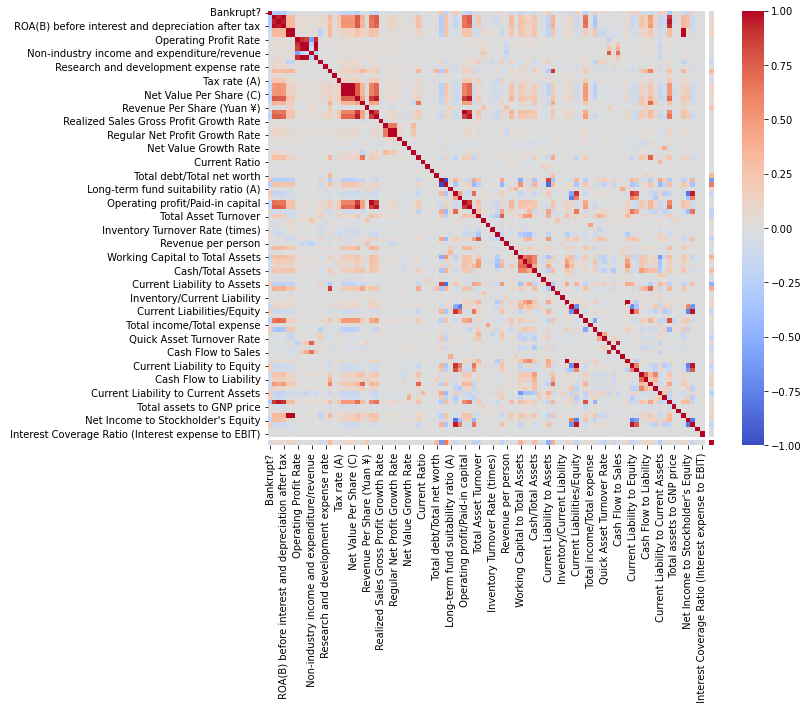

In [5]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

#### 2b) Obtaining Top 10 correlated variables 
Due to the large number of columns in our dataset (96), it would be unwieldy to work with all of them. As a solution, we will extract a subset of the most important columns and create a new dataframe containing only the top (10) columns. The top (10) columns contains the variables with the highest absolute correlation with the bankruptcy variable.

In [6]:
# Compute the absolute correlations between the target column and all other columns
target_column = 'Bankrupt?'
abs_correlations = df.corr().abs()[target_column]

# Get the top 10 columns with the highest absolute correlation values
top_10_cols = abs_correlations.sort_values(ascending=False)[1:11].index.tolist()

# Print the names of the top 10 columns
print("Top 10 columns with the highest absolute correlation to the target column:")
print(top_10_cols)


Top 10 columns with the highest absolute correlation to the target column:
[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)']


#### 2c) Top 10 variables analytical analysis 

Generating a novel dataframe consisting of the top 10 variables

In [7]:
# Add the Bankrupt? column to the list of top 10 columns
top_10_cols_with_bankrupt = top_10_cols.copy()
top_10_cols_with_bankrupt.insert(0, target_column)

### Created a new DataFrame that contains the top 10 columns with the (Bankrupt) column
new_df_with_bankrupt = df[top_10_cols_with_bankrupt]

# Create a new DataFrame that contains only the top 10 columns, without (Bankrupt) column <JUST IN CASE>
new_df = df[top_10_cols]

# Print the head of the new DataFrame to verify that it contains the correct columns
new_df_with_bankrupt.head()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,1,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803
3,1,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412


Analysis of top 10 variables

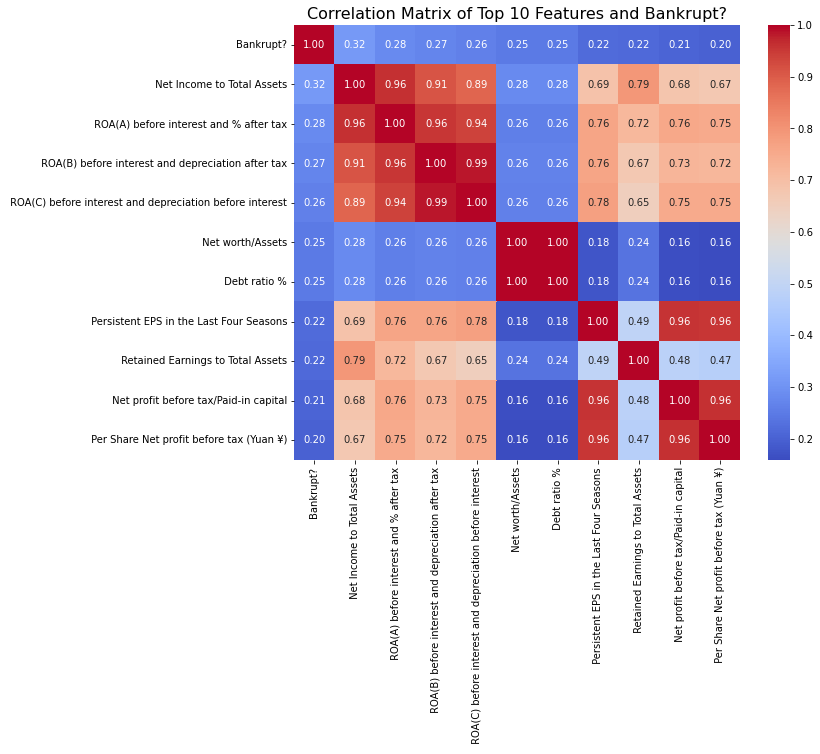

In [8]:
# Create a correlation matrix for the new DataFrame
corr_matrix = new_df_with_bankrupt.corr().abs()

# Compute number and percentage of instances with "Bankrupt?" equal to 1 or 0
counts = new_df_with_bankrupt['Bankrupt?'].value_counts()
total = len(new_df_with_bankrupt)
percentages = counts / total * 100

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features and Bankrupt?', fontsize=16)
plt.show()

#### 2d) Investigating Class Distribution (Bankruptcy)

Number of instances with Bankrupt? equal to 0: 6599, Percentage: 96.77%
Number of instances with Bankrupt? equal to 1: 220, Percentage: 3.23%


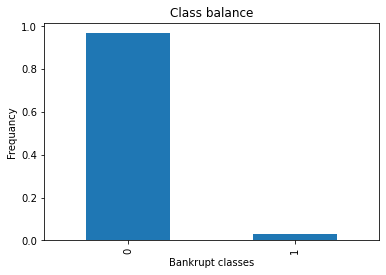

In [9]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");
# Output results
print(f"Number of instances with Bankrupt? equal to 0: {counts[0]}, Percentage: {percentages[0]:.2f}%")
print(f"Number of instances with Bankrupt? equal to 1: {counts[1]}, Percentage: {percentages[1]:.2f}%")


**Understanding Bankrupt Vs non bankrupt relationship**

As seen from these graphs, most of the numerical values on Bankrupt=0 (blue) are rather symmetrical, while the numerical values of Bankrupt=1 (orange) is slightly wider spread. This is expected as the ratio of data is different with bankrupt=1(orange) make up just 3.23% of the data

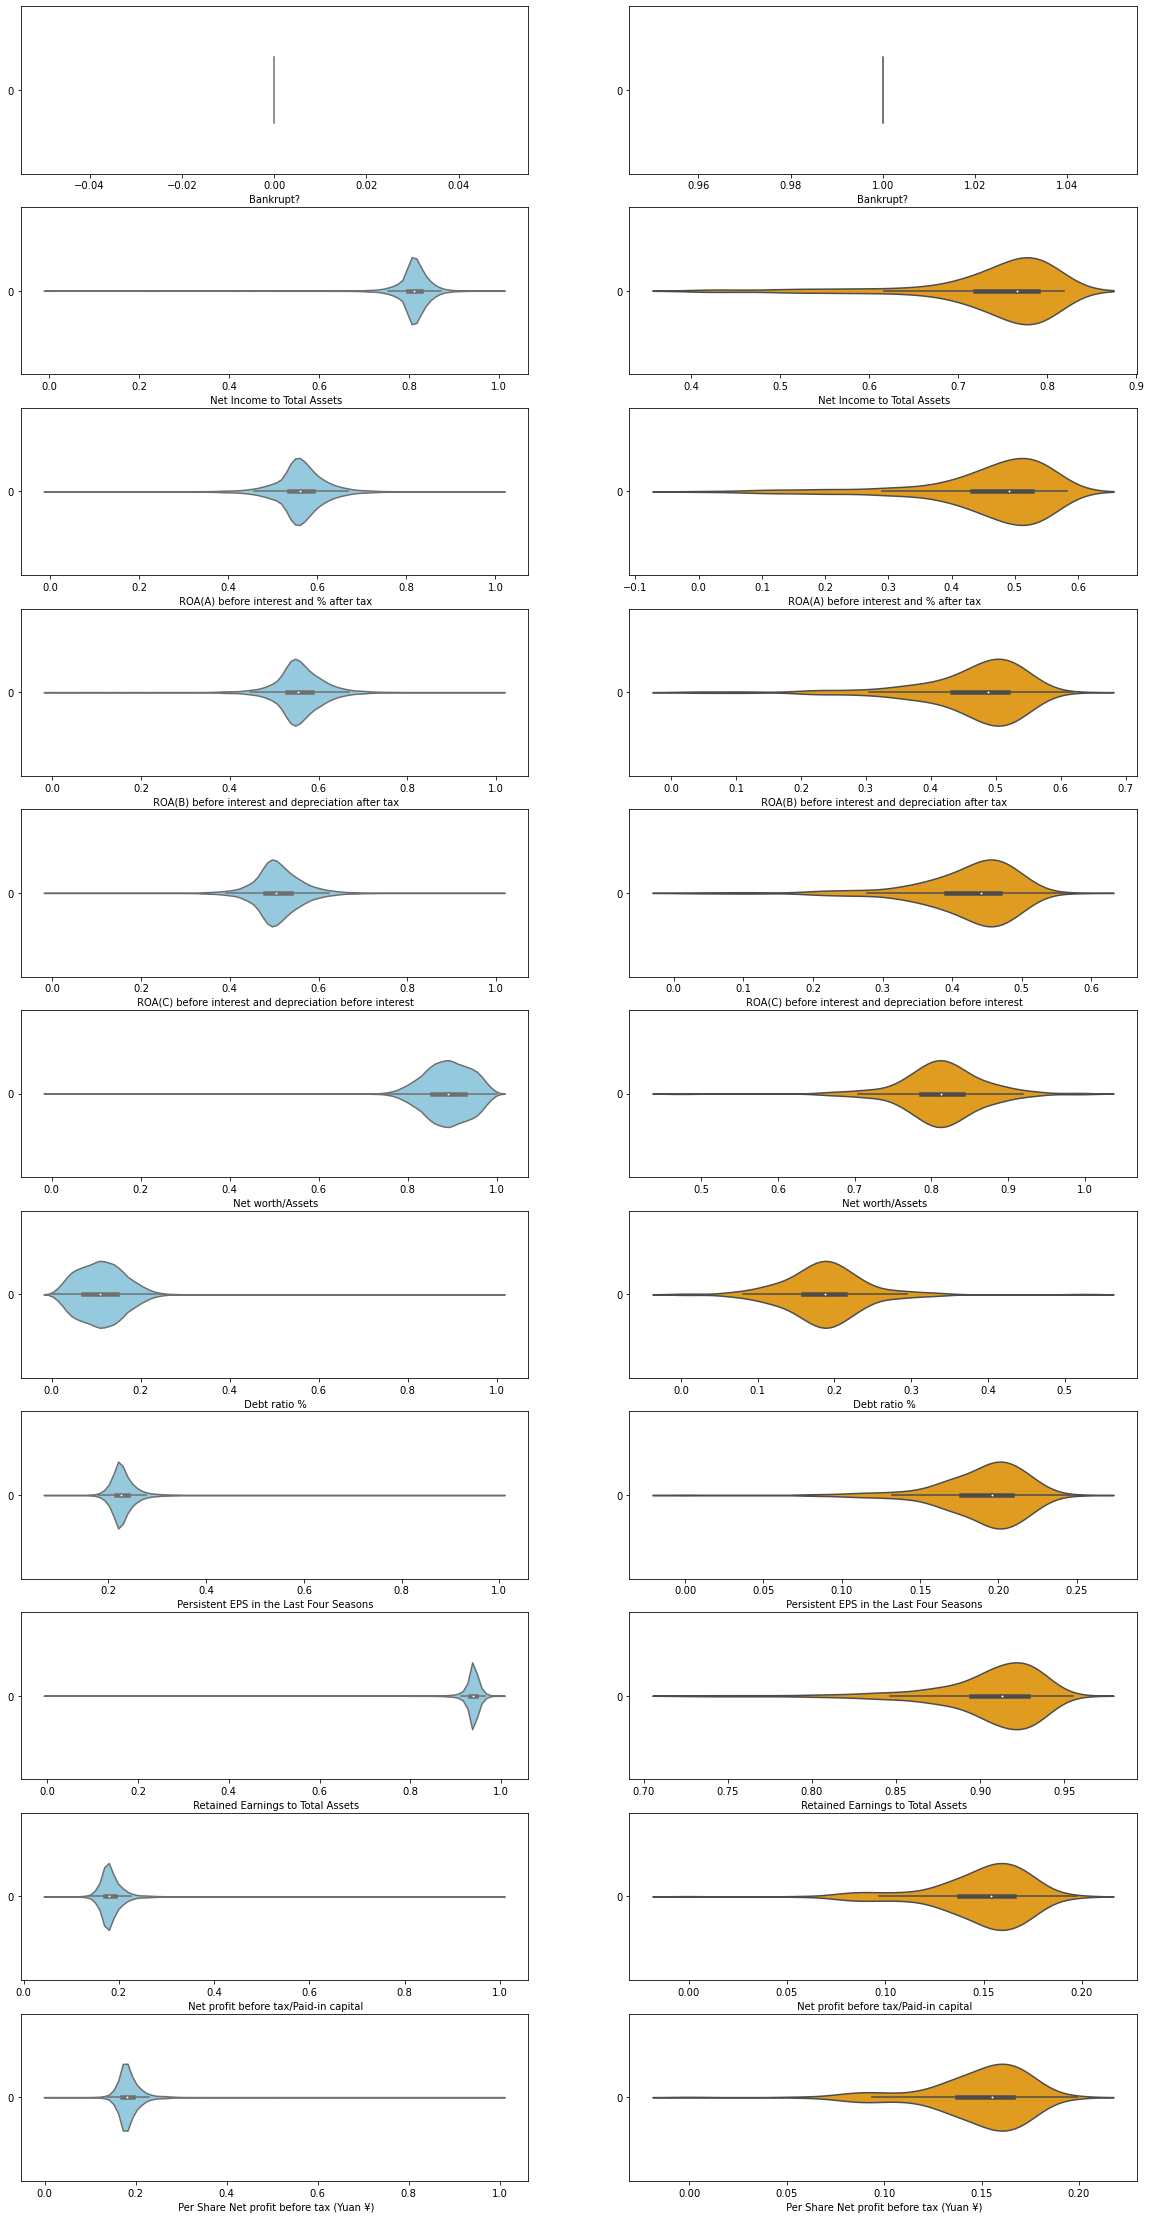

In [10]:
# Split the data into bankrupt and non-bankrupt companies
bankrupt_0 = new_df_with_bankrupt[new_df_with_bankrupt['Bankrupt?'] == 0].reset_index(drop=True)
bankrupt_1 = new_df_with_bankrupt[new_df_with_bankrupt['Bankrupt?'] == 1].reset_index(drop=True)

# Draw the distributions of all variables
f, axes = plt.subplots(11,2, figsize=(20, 40))

# Plot bankrupt_0
count = 0
for row in range(11):
    for col in range(1):
        if count == len(bankrupt_0.columns):
            break
        sb.violinplot(data=bankrupt_0[bankrupt_0.columns[count]], orient="h", ax=axes[row, col], color='skyblue')
        axes[row, col].set_xlabel(bankrupt_0.columns[count], fontsize=10)
        # Set y-axis limits to be the same for all subplots
        axes[row, col].set_ylim([-1,1])
        count += 1

# Plot bankrupt_1
count = 0
for row in range(11):
    for col in range(1,2):
        if count == len(bankrupt_1.columns):
            break
        sb.violinplot(data=bankrupt_1[bankrupt_1.columns[count]], orient="h", ax=axes[row, col], color='orange')
        axes[row, col].set_xlabel(bankrupt_1.columns[count], fontsize=10)
        # Set y-axis limits to be the same for all subplots
        axes[row, col].set_ylim([-1,1])
        count += 1

plt.show()

#### 2d) Analysing Highest correlated variable – ' Net Income to Total Assets'
Extracting the most correlated variable in a dataset is crucial in predicting bankruptcy. It helps to identify the variables which can potentially have a strong influence on the outcome of the prediction model. Analyzing the distribution, box plot and violin plot of the most correlated variable provides insight into the range of values and the distribution of the variable, which can help identify any outliers or anomalies that may be affecting the prediction model. This can also help refine the feature selection and engineering process, and ultimately improve the accuracy of the prediction model. Therefore, analyzing the most correlated variable is a critical step in building a robust and accurate bankruptcy prediction model.

In [11]:
new_df_with_bankrupt[' Net Income to Total Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name:  Net Income to Total Assets, dtype: float64

**' Net Income to Total Assets' analysis**

The distribution plot shows us that the mode is 400 and concentrated around 0.8 correlation. Most data do not differ from one another

It also shows that many outliers are congested just outside the 0.25 and 0.75 range and a few are pretty far away. 

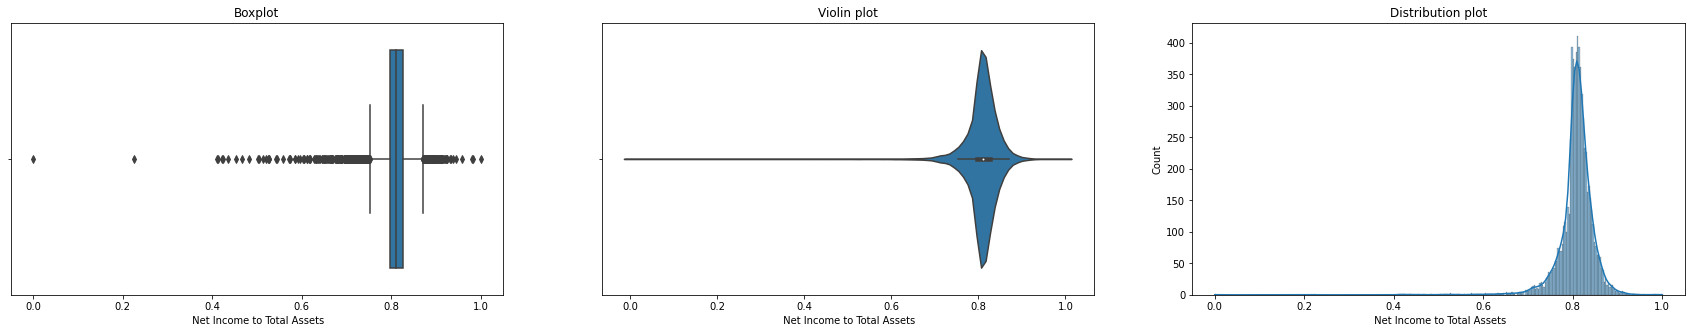

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(30,5))

# Boxplot
sns.boxplot(x=' Net Income to Total Assets', data=new_df_with_bankrupt, ax=axes[0])
axes[0].set_title('Boxplot')

# Violin plot
sns.violinplot(x=' Net Income to Total Assets', data=new_df_with_bankrupt, ax=axes[1])
axes[1].set_title('Violin plot')

# Distribution plot
sns.histplot(x=' Net Income to Total Assets', data=new_df_with_bankrupt, kde=True, ax=axes[2])
axes[2].set_title('Distribution plot')

plt.show()

Given the significant amount of outliers, we thus move on to investigate if it is necessary to remove these outliers. 

### 3) Evaulating Outliers
Removing outliers is important because they can distort the distribution of the data and affect the calculation of important statistical measures such as the mean and standard deviation. By removing outliers, we can improve the accuracy and reliability of our analysis and modeling process. This can lead to better decision making, and more accurate predictions and insights from the data. 

However, it is important to note that outlier removal should be done carefully and thoughtfully, as it can also result in loss of information and potentially bias the analysis if not done appropriately which we will further explore later on.

In [13]:
new_df_for_outliers = new_df_with_bankrupt.copy()
# Calculate the quartiles and interquartile range for the 'Retained Earnings to Total Assets' column
Q1 = new_df_with_bankrupt[' Net Income to Total Assets'].quantile(0.25)
Q3 = new_df_with_bankrupt[' Net Income to Total Assets'].quantile(0.75)
IQR = Q3 - Q1

# Identify the indices of the outliers in the 'Retained Earnings to Total Assets' column
outliers = np.where((new_df_with_bankrupt[' Net Income to Total Assets'] < (Q1 - 1.5 * IQR)) | (new_df_with_bankrupt[' Net Income to Total Assets'] > (Q3 + 1.5 * IQR)))

# Create a new dataframe called new_df_no_outliers that does not contain the outliers
new_df_no_outliers = new_df_with_bankrupt.drop(new_df_with_bankrupt.index[outliers]).reset_index(drop=True)

# Print information about the new_df_no_outliers DataFrame
new_df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6258 entries, 0 to 6257
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6258 non-null   int64  
 1    Net Income to Total Assets                               6258 non-null   float64
 2    ROA(A) before interest and % after tax                   6258 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6258 non-null   float64
 4    ROA(C) before interest and depreciation before interest  6258 non-null   float64
 5    Net worth/Assets                                         6258 non-null   float64
 6    Debt ratio %                                             6258 non-null   float64
 7    Persistent EPS in the Last Four Seasons                  6258 non-null   float64
 8    Retained Earnings

#### 3.a) Generating new Dataframe without outliers

Start - RangeIndex: 6819 entries. 
Data columns (total 96 columns):

After - RangeIndex: 6258 entries. 
Data columns (total 10 columns):

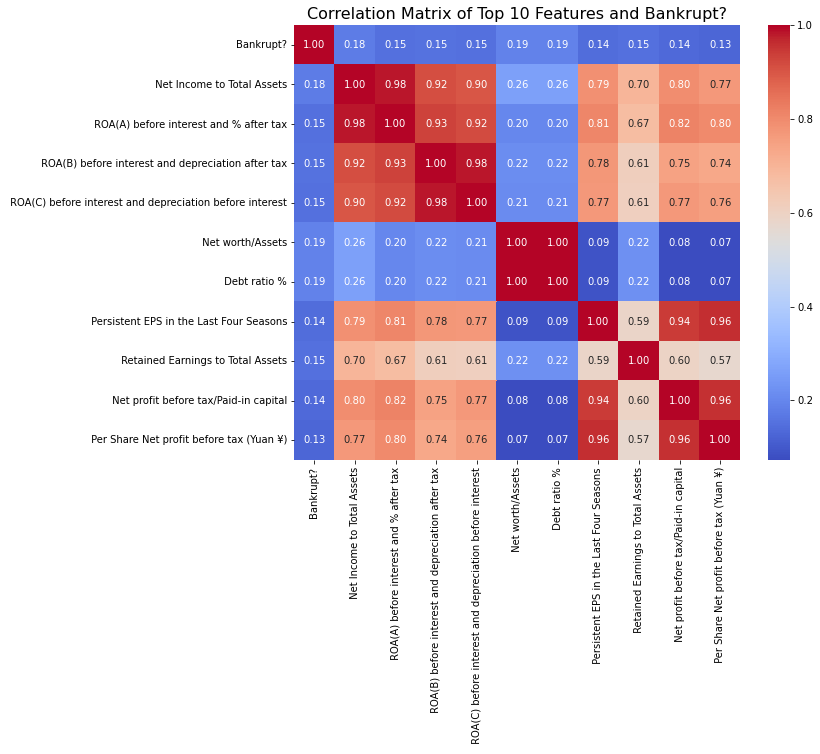

In [14]:
# Create a correlation matrix for the new DataFrame
corr_matrix = new_df_no_outliers.corr().abs()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features and Bankrupt?', fontsize=16)
plt.show()

#### 3.b) Scatterplots to evaluate non-linear relationshp betweeen variables

Infering it is also interesting to note the correlation of "Net worth/Assets" and "debt ratio%" against other numerical data have a low correlation against all of correlation being below (0.3). 
This shows that all the variables have a low linear correlation against  "Net worth/Assets" and "debt ratio%". Hence, they have a poor linear relationship. This may hint of a non-linear relationship. 

Hence, we shall explore non-linear models such as scatterplots.

In [15]:
sb.pairplot(data = new_df_no_outliers, corner = True)

Specifically for 'Net worth/Assets' and ' Debt ratio %' against the other numerical variables

In [16]:
sb.pairplot(data=new_df_no_outliers,
                  y_vars=[' Net worth/Assets',' Debt ratio %'],
                  x_vars=[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'])

The scatterplots above show that majority of the points are evenly distributed upwards and all to the left half of the graph, suggesting that there is a weak or lack of relationship between the two variables.

The fact that the points are all concentrated on the left half of the graph suggests that there may be a clustering of values for the variable on the x-axis. However, the even distribution of the points upwards suggests that for any given value of the variable on the x-axis, there is a wide range of possible values of the variable on the y-axis.

In this case, the lack of a clear pattern or trend in the scatterplot suggests that there may not be a strong relationship between the two variables. It is possible that the variables are independent of each other, meaning that changes in one variable do not necessarily affect the other variable.

#### 3.c) Outliers Analysis 
Comparison of data without outliers and data with only outliers

In [17]:

# Calculate the quartiles and interquartile range for the 'Retained Earnings to Total Assets' column
Q1 = new_df_for_outliers[' Net Income to Total Assets'].quantile(0.25)
Q3 = new_df_for_outliers[' Net Income to Total Assets'].quantile(0.75)
IQR = Q3 - Q1

# Identify the indices of the outliers in the 'Retained Earnings to Total Assets' column
outliers = np.where((new_df_for_outliers[' Net Income to Total Assets'] < (Q1 - 1.5 * IQR)) | (new_df_for_outliers[' Net Income to Total Assets'] > (Q3 + 1.5 * IQR)))

# Create a new dataframe called data_outliers that contains only the outliers
data_outliers = new_df_for_outliers.iloc[outliers].reset_index(drop=True)


# Print information about the data_outliers DataFrame
data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 561 non-null    int64  
 1    Net Income to Total Assets                               561 non-null    float64
 2    ROA(A) before interest and % after tax                   561 non-null    float64
 3    ROA(B) before interest and depreciation after tax        561 non-null    float64
 4    ROA(C) before interest and depreciation before interest  561 non-null    float64
 5    Net worth/Assets                                         561 non-null    float64
 6    Debt ratio %                                             561 non-null    float64
 7    Persistent EPS in the Last Four Seasons                  561 non-null    float64
 8    Retained Earnings t

<AxesSubplot:>

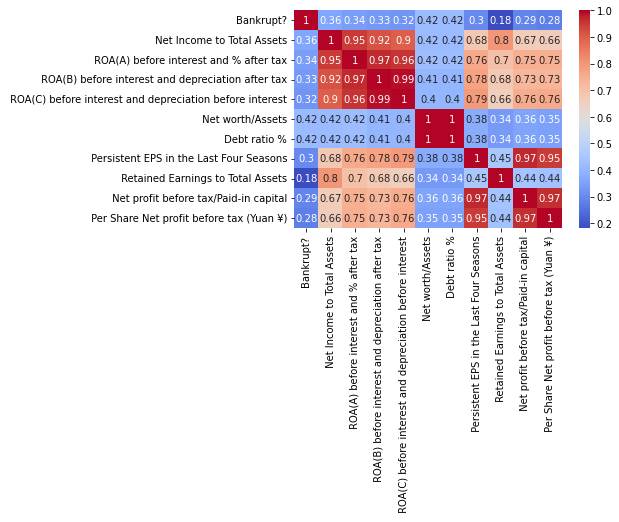

In [18]:
# Compute pairwise correlation of columns
corr = data_outliers.corr().abs()

# Plot correlation heat map
sns.heatmap(corr, annot=True, cmap='coolwarm')

The heatmap of the outliers is almost the same as the heatmap of non-outliers, this suggests that removing the outliers does not substantially change the relationship between the variables, as the correlation values between the variables are similar both with and without the outliers.

However, it is still important to consider the impact of the outliers on other aspects of the data analysis, such as the accuracy of the model or the overall distribution of the data. Outliers can still have an effect on the performance of the model or on the interpretation of the data, even if they do not substantially change the correlation between variables.

#### 3.d) Evaluating class distribution in outliers

In [19]:
# Compute number and percentage of instances with "Bankrupt?" equal to 1 or 0
counts = data_outliers['Bankrupt?'].value_counts()
total = len(data_outliers)
percentages = counts / total * 100

# Output results
print(f"Number of instances with Bankrupt? equal to 0: {counts[0]}, Percentage: {percentages[0]:.2f}%")
print(f"Number of instances with Bankrupt? equal to 1: {counts[1]}, Percentage: {percentages[1]:.2f}%")

Number of instances with Bankrupt? equal to 0: 471, Percentage: 83.96%
Number of instances with Bankrupt? equal to 1: 90, Percentage: 16.04%


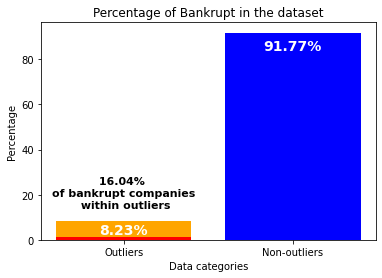

In [20]:
# define the data
total_rows = 6819
num_outliers = 561
outlier_percent = round(num_outliers / total_rows * 100, 2)
bankrupt_within_outliers_percent = round(16.04 / 100 * outlier_percent, 2)
bankrupt_outlier_percent = round(bankrupt_within_outliers_percent / outlier_percent * 100, 2)

# create the bar chart
labels = ['Outliers', 'Non-outliers']
percentages = [outlier_percent, 100-outlier_percent]
colors = ['orange', 'blue']
plt.bar(labels, percentages, color=colors)

# add a different color for bankrupt companies within outliers
plt.bar('Outliers', bankrupt_within_outliers_percent, color='red')

# add annotations
plt.text(0, outlier_percent/2, str(outlier_percent) + '%', ha='center', va='center', color='white', fontweight='bold', fontsize=14)
plt.text(1, 100-outlier_percent/2 - 10, str(100-outlier_percent) + '%', ha='center', va='center', color='white', fontweight='bold', fontsize=14)
plt.text(0, bankrupt_within_outliers_percent/2 + 20, str(bankrupt_outlier_percent) + '% \nof bankrupt companies\n within outliers', ha='center', va='center', color='Black', fontweight='bold', fontsize=11)

# add title and axis labels
plt.title('Percentage of Bankrupt in the dataset')
plt.xlabel('Data categories')
plt.ylabel('Percentage')

# show the plot
plt.show()

The original dataset comprises of a total of 6819 rows with 561 outliers. Outliers make up 8.23 % of the data and within those lies 16.04% of the total companies which went bankrupt.

The fact that 16.04% of the total companies which went bankrupt lies in the outliers, highlights the potential importance of the outliers in predicting bankruptcy. Removing the outliers from the dataset may result in a loss of information, a biased sample, thus resulting in inaccurate conclusions and potentially overlook important factors that contributes to the bankruptcy of those companies.

### Conclusion

Based on the fact that the outliers are important in predicting bankruptcy and removing them could lead to biased conclusions, it is recommended to use alternative techniques such as UP/DOWN SAMPLING to deal with the presence of outliers. UP/DOWN SAMPLING involves adjusting the class distribution of the data set by either undersampling the majority class or oversampling the minority class to balance the dataset, which can help to address the potential impact of the outliers on the analysis while still retaining important information. This approach is more appropriate than removing the outliers because it allows for a more comprehensive analysis and considers the potential influence of the outliers in the final results.